In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
smartphone_df = pd.read_csv('smartphones.csv')
smartphone_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [3]:
new_smartphone_df = smartphone_df[['price', 'has_5g', 'has_nfc', 'has_ir_blaster', 'num_cores', 'processor_speed',
                                   'battery_capacity', 'fast_charging_available', 'ram_capacity', 'internal_memory', 'screen_size',
                                   'refresh_rate', 'num_rear_cameras', 'os']]
new_smartphone_df.head()

,price,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os
0,54999,True,True,False,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,3,android
1,19989,True,False,False,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,3,android
2,16499,True,False,False,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,3,android
3,14999,True,False,False,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,3,android
4,24999,True,False,False,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,3,android


In [4]:
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    980 non-null    int64  
 1   has_5g                   980 non-null    bool   
 2   has_nfc                  980 non-null    bool   
 3   has_ir_blaster           980 non-null    bool   
 4   num_cores                974 non-null    float64
 5   processor_speed          938 non-null    float64
 6   battery_capacity         969 non-null    float64
 7   fast_charging_available  980 non-null    int64  
 8   ram_capacity             980 non-null    float64
 9   internal_memory          980 non-null    float64
 10  screen_size              980 non-null    float64
 11  refresh_rate             980 non-null    int64  
 12  num_rear_cameras         980 non-null    int64  
 13  os                       966 non-null    object 
dtypes: bool(3), float64(6), in

In [5]:
#Dropping null values from dataframe
new_smartphone_df = new_smartphone_df.dropna()
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 978
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    914 non-null    int64  
 1   has_5g                   914 non-null    bool   
 2   has_nfc                  914 non-null    bool   
 3   has_ir_blaster           914 non-null    bool   
 4   num_cores                914 non-null    float64
 5   processor_speed          914 non-null    float64
 6   battery_capacity         914 non-null    float64
 7   fast_charging_available  914 non-null    int64  
 8   ram_capacity             914 non-null    float64
 9   internal_memory          914 non-null    float64
 10  screen_size              914 non-null    float64
 11  refresh_rate             914 non-null    int64  
 12  num_rear_cameras         914 non-null    int64  
 13  os                       914 non-null    object 
dtypes: bool(3), float64(6), int64(4

Text(0.5, 0, 'price')

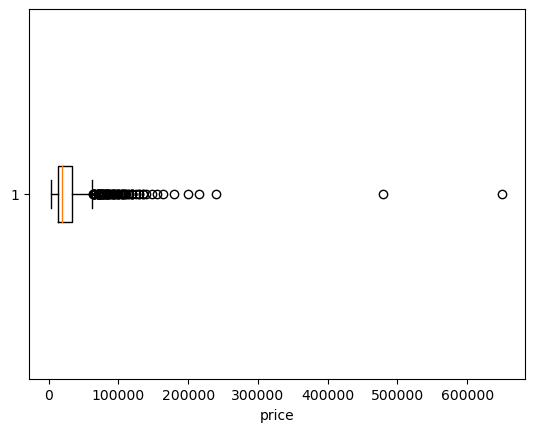

In [6]:
#Finding outliers in the price feature
plt.boxplot(new_smartphone_df['price'], vert=False)
plt.xlabel('price')

In [7]:
print(new_smartphone_df['price'].nlargest(5))

427    650000
887    480000
478    239999
951    214990
458    199990
Name: price, dtype: int64


In [8]:
#Dropping outliers
new_smartphone_df = new_smartphone_df.drop([427, 887], axis=0)
print(new_smartphone_df['price'].nlargest(5))

478    239999
951    214990
458    199990
756    179900
905    163980
Name: price, dtype: int64


Text(0.5, 0, 'Battery Capacity')

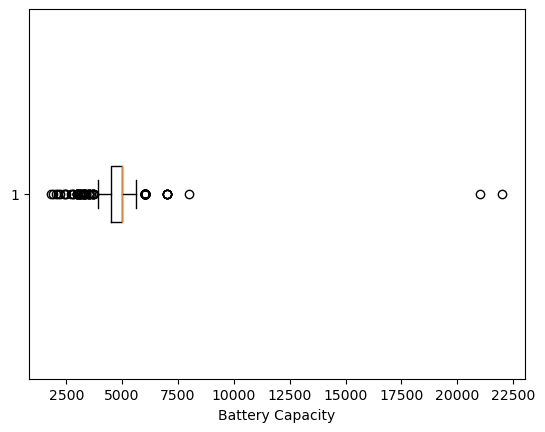

In [9]:
#Finding outliers in the battery_capacity feature of the dataset
plt.boxplot(new_smartphone_df['battery_capacity'], vert=False)
plt.xlabel('Battery Capacity')

In [10]:
print(new_smartphone_df['battery_capacity'].nlargest(5))

843    22000.0
391    21000.0
966     8000.0
216     7000.0
276     7000.0
Name: battery_capacity, dtype: float64


In [11]:
#Dropping outliers
new_smartphone_df = new_smartphone_df.drop([843, 391], axis=0)
print(new_smartphone_df['battery_capacity'].nlargest(5))

966    8000.0
216    7000.0
276    7000.0
479    7000.0
822    7000.0
Name: battery_capacity, dtype: float64


In [12]:
#One hot encoding the os column
new_smartphone_df = pd.get_dummies(new_smartphone_df, columns=['os'])
new_smartphone_df.head()

,price,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os_android,os_ios,os_other
0,54999,True,True,False,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,3,True,False,False
1,19989,True,False,False,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,3,True,False,False
2,16499,True,False,False,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,3,True,False,False
3,14999,True,False,False,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,3,True,False,False
4,24999,True,False,False,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,3,True,False,False


In [13]:
new_smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 978
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    910 non-null    int64  
 1   has_5g                   910 non-null    bool   
 2   has_nfc                  910 non-null    bool   
 3   has_ir_blaster           910 non-null    bool   
 4   num_cores                910 non-null    float64
 5   processor_speed          910 non-null    float64
 6   battery_capacity         910 non-null    float64
 7   fast_charging_available  910 non-null    int64  
 8   ram_capacity             910 non-null    float64
 9   internal_memory          910 non-null    float64
 10  screen_size              910 non-null    float64
 11  refresh_rate             910 non-null    int64  
 12  num_rear_cameras         910 non-null    int64  
 13  os_android               910 non-null    bool   
 14  os_ios                   910 no

In [14]:
#Represents phone specifications a consumer buying a phone for gaming might want
gamer_phone = pd.DataFrame({'has_5g':1, 'has_nfc':0, 'has_ir_blaster':0, 'num_cores':8, 'processor_speed':3.6, 'battery_capacity':6000, 'fast_charging_available':1, 'ram_capacity':16, 'internal_memory':500, 'screen_size':6.8, 'refresh_rate':240, 'num_rear_cameras':1, 'os_android':True, 'os_ios':False, 'os_other':False}, index=[99])
gamer_phone.head()

,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os_android,os_ios,os_other
99,1,0,0,8,3.6,6000,1,16,500,6.8,240,1,True,False,False


In [15]:
#Represents phone specifications a consumer buying a phone for photography might want
photographer_phone = pd.DataFrame({'has_5g':1, 'has_nfc':0, 'has_ir_blaster':0, 'num_cores':8, 'processor_speed':3.0, 'battery_capacity':5000, 'fast_charging_available':1, 'ram_capacity':12, 'internal_memory':1000, 'screen_size':6.8, 'refresh_rate':60, 'num_rear_cameras':3, 'os_android':True, 'os_ios':False, 'os_other':False}, index=[99])
photographer_phone.head()

,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os_android,os_ios,os_other
99,1,0,0,8,3.0,5000,1,12,1000,6.8,60,3,True,False,False


In [16]:
#Splitting the dataframe 
X_train, X_test, y_train, y_test = train_test_split(new_smartphone_df[['has_5g', 'has_nfc', 'has_ir_blaster', 'num_cores', 'processor_speed',
                                   'battery_capacity', 'fast_charging_available', 'ram_capacity', 'internal_memory', 'screen_size',
                                   'refresh_rate', 'num_rear_cameras', 'os_android', 'os_ios', 'os_other']],
                                                   new_smartphone_df['price'], test_size=0.2, random_state=40)

In [17]:
#Developing linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
linear_predictions = linear_model.predict(X_test)

In [19]:
linear_predict_df = pd.DataFrame(columns=['test_data', 'predictions'])
linear_predict_df['test_data'] = y_test
linear_predict_df['predictions'] = linear_predictions
linear_predict_df

,test_data,predictions
307,14999,18514.839060
961,13990,15668.445889
482,12990,17310.596673
691,18990,27271.561486
337,64800,43381.812435
...,...,...
364,50999,63892.302901
202,71999,62323.570411
532,61990,42591.519612
530,10799,9406.540112


In [20]:
#Root mean squared eror
rmse = mean_squared_error(y_test, linear_predictions, squared=False)
rmse

14283.875455997832

In [21]:
#Mean absolute error
mae = mean_absolute_error(y_test, linear_predictions)
mae

9321.461573640072

In [22]:
linear_predict_df = linear_predict_df.reset_index()
linear_predict_df = linear_predict_df.drop(columns=['index'])

In [23]:
linear_predict_df.head()

,test_data,predictions
0,14999,18514.839060
1,13990,15668.445889
2,12990,17310.596673
3,18990,27271.561486
4,64800,43381.812435


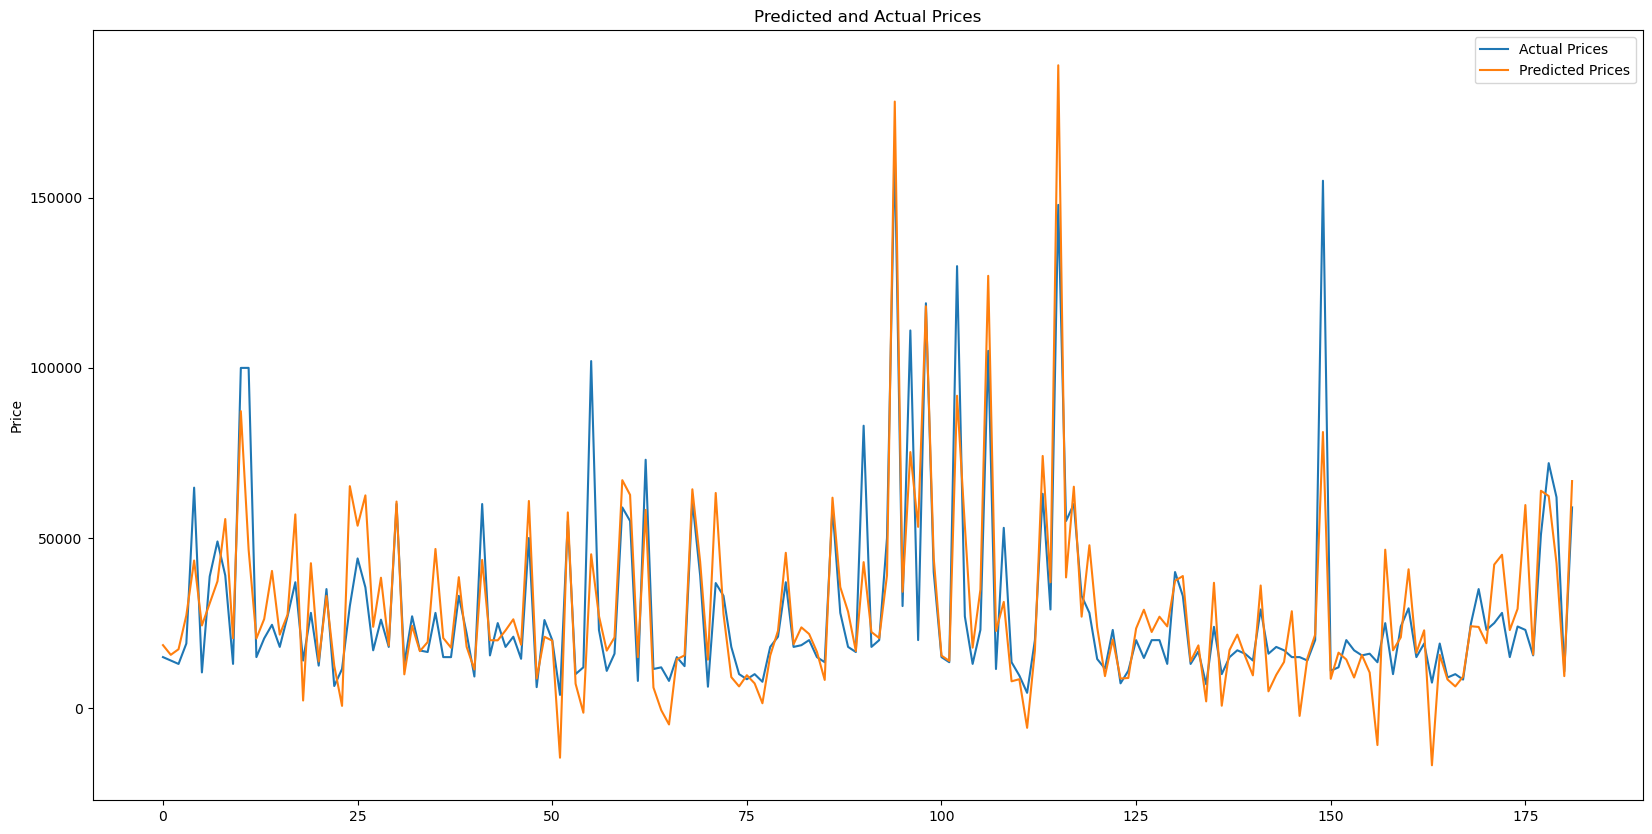

In [24]:
#Plotting predicted prices and actual prices
plt.figure(figsize=(20, 10))
plt.plot(linear_predict_df)
plt.ylabel('Price')
plt.title('Predicted and Actual Prices')
plt.legend(['Actual Prices', 'Predicted Prices'])

In [25]:
#Predicted price for gaming phone
linear_model.predict(gamer_phone)

array([80872.25016393])

In [26]:
#Predicted price for photography phone
linear_model.predict(photographer_phone)

array([149643.32374125])

In [27]:
#Developing logistic regression model
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
logistic_predictions = logistic_model.predict(X_test)

In [29]:
logistic_predict_df = pd.DataFrame(columns=['test_data', 'predictions'])
logistic_predict_df['test_data'] = y_test
logistic_predict_df['predictions'] = logistic_predictions
logistic_predict_df

,test_data,predictions
307,14999,13999
961,13990,18999
482,12990,11999
691,18990,19990
337,64800,29990
...,...,...
364,50999,39999
202,71999,29999
532,61990,39999
530,10799,13999


In [30]:
#Root mean squared error
rmse = mean_squared_error(y_test, logistic_predictions, squared=False)
rmse

15854.394489080452

In [31]:
#Mean absolute error
mae = mean_absolute_error(y_test, logistic_predictions)
mae

8407.263736263736

In [32]:
logistic_predict_df = logistic_predict_df.reset_index()
logistic_predict_df = logistic_predict_df.drop(columns=['index'])

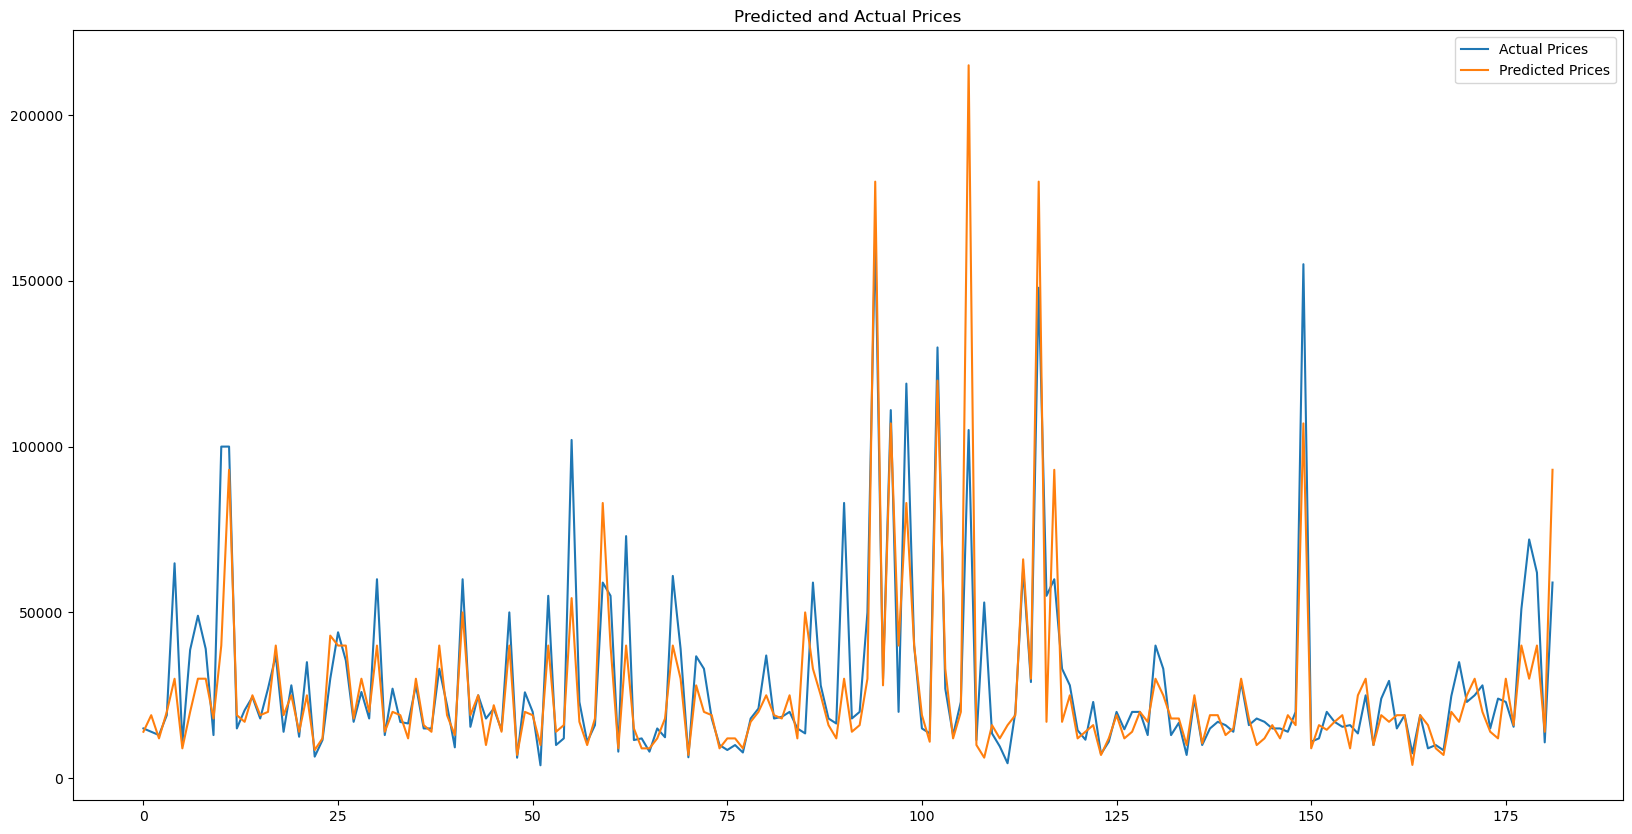

In [33]:
#Plotting predicted prices and actual prices
plt.figure(figsize=(20, 10))
plt.plot(logistic_predict_df)
plt.title('Predicted and Actual Prices')
plt.legend(['Actual Prices', 'Predicted Prices'])

In [34]:
#Predicted price for gaming phone
logistic_model.predict(gamer_phone)

array([59999])

In [35]:
#Predicted price for photography phone
logistic_model.predict(photographer_phone)

array([214990])

In [36]:
#Finding the best max_depth
max_depth = []
rmse_list = []
mae_list = []
for i in range(2, 41):
    max_depth.append(i)
    randomforest_model = RandomForestRegressor(max_depth=i)
    randomforest_model.fit(X_train, y_train)
    randomforest_predictions = randomforest_model.predict(X_test)
    rmse = mean_squared_error(y_test, randomforest_predictions, squared=False)
    rmse_list.append(rmse)

for i in range(2, 41):
    randomforest_model = RandomForestRegressor(max_depth=i)
    randomforest_model.fit(X_train, y_train)
    randomforest_predictions = randomforest_model.predict(X_test)
    mae = mean_absolute_error(y_test, randomforest_predictions)
    mae_list.append(mae)

randomforest_accuracy_df = pd.DataFrame(columns=['max_depth', 'rmse', 'mae'])
randomforest_accuracy_df['max_depth'] = max_depth
randomforest_accuracy_df['rmse'] = rmse_list
randomforest_accuracy_df['mae'] = mae_list

In [37]:
randomforest_accuracy_df.head(15)

,max_depth,rmse,mae
0,2,15834.406451,9020.135746
1,3,13555.011933,7872.938981
2,4,12238.760804,6931.956190
3,5,11361.901535,6457.139950
4,6,10455.828932,6016.627959
5,7,10546.073692,5715.197211
6,8,10493.794548,5792.058713
7,9,10127.520214,5669.048037
8,10,10211.102613,5679.730594
9,11,10534.816105,5537.218883


Text(0.5, 1.0, 'Model Accuracy at Each Value for max_depth')

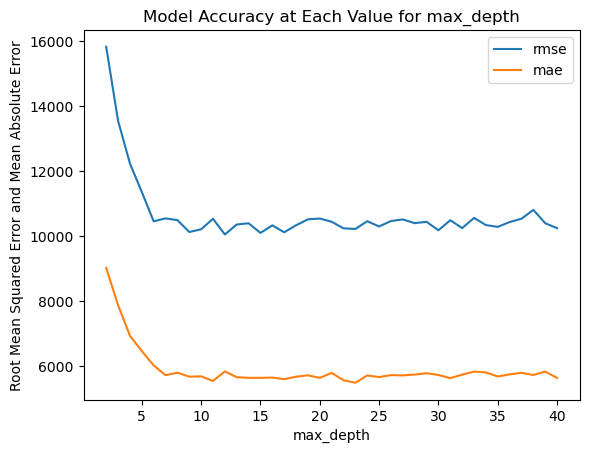

In [38]:
#Plotting root mean squared error and mean absolute error to show accuracy when max_depth it set to different values
randomforest_accuracy_df.plot(x='max_depth', y=['rmse', 'mae'])
plt.ylabel('Root Mean Squared Error and Mean Absolute Error')
plt.title('Model Accuracy at Each Value for max_depth')

In [39]:
#Developing random forest regression model
randomforest_model = RandomForestRegressor(max_depth=11)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11)

In [40]:
randomforest_predictions = randomforest_model.predict(X_test)

In [41]:
randomforest_predict_df = pd.DataFrame(columns=['test_data', 'predictions'])
randomforest_predict_df['test_data'] = y_test
randomforest_predict_df['predictions'] = randomforest_predictions
randomforest_predict_df.head()

,test_data,predictions
307,14999,14224.488139
961,13990,17217.821466
482,12990,15475.230666
691,18990,21737.245228
337,64800,53454.714913


In [42]:
randomforest_predict_df = randomforest_predict_df.reset_index()
randomforest_predict_df = randomforest_predict_df.drop(columns=['index'])

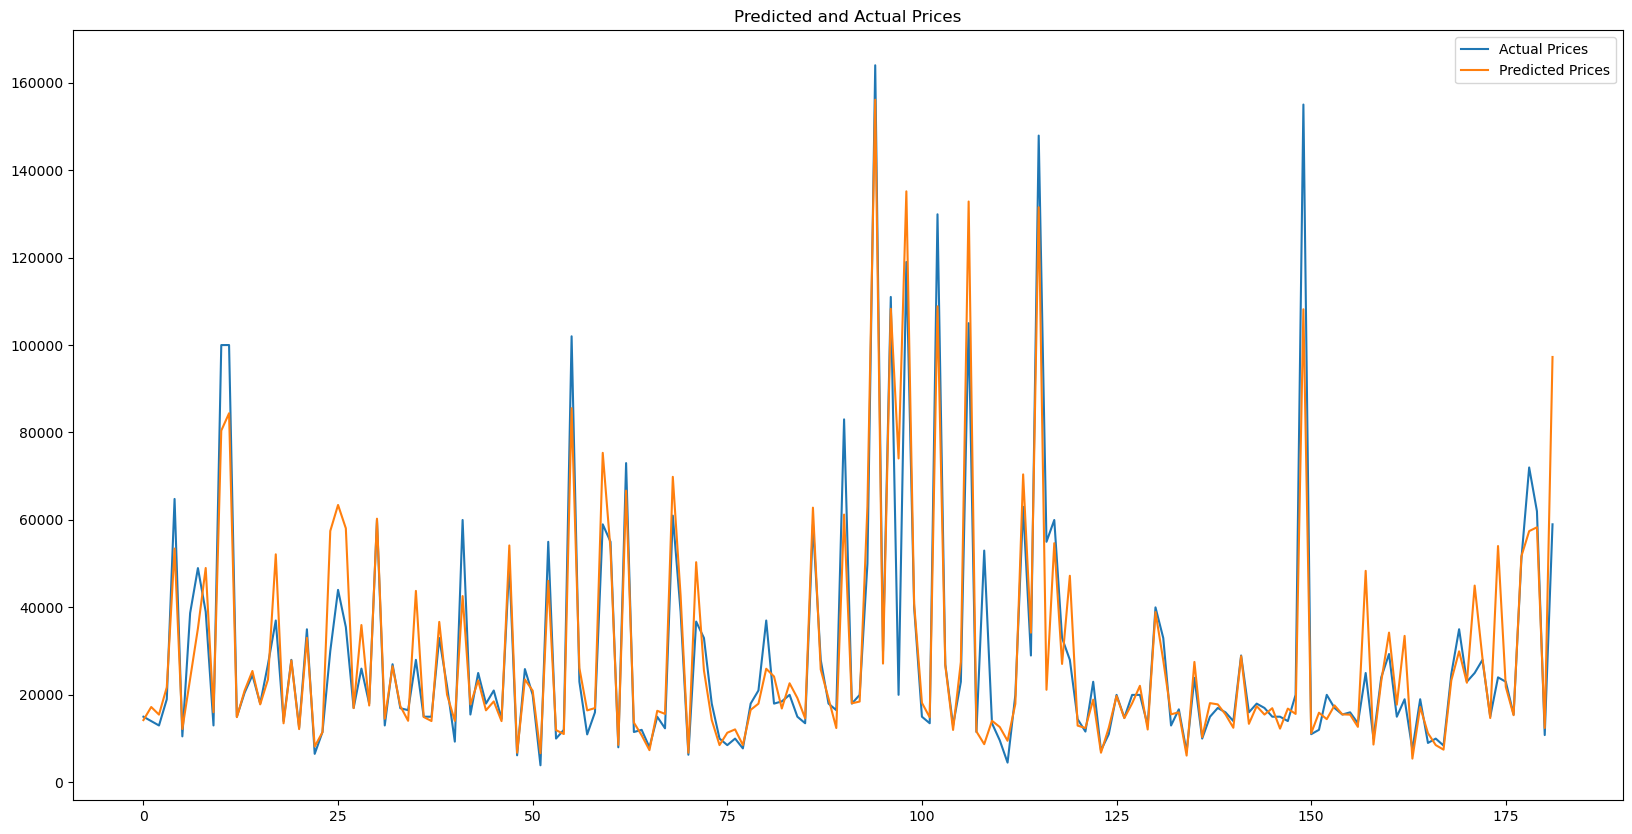

In [43]:
#Plotting predicted prices and actual prices
plt.figure(figsize=(20, 10))
plt.plot(randomforest_predict_df)
plt.title('Predicted and Actual Prices')
plt.legend(['Actual Prices', 'Predicted Prices'])

In [44]:
#Predicted price for gaming phone
randomforest_model.predict(gamer_phone)

array([105434.5])

In [45]:
#Predicted price for photography phone
randomforest_model.predict(photographer_phone)

array([124451.31])